In [1]:
#QUESTION:

#What words are the most successful and unsuccessful for game titles?

In [2]:
#ENVIRONMENT INITIALISING

#import pandas for data visualisation
import pandas as pd

#import matplot and seaborn for visualising date data
import matplotlib.pyplot as plt
import seaborn as sns

#Set to colour blind friendly palette
sns.set(palette='flare')

#import word cloud for visualisations
from wordcloud import WordCloud

#correct matplot compatibility error
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
# ignore warnings 
import warnings 
warnings.filterwarnings("ignore")

#import numpy for mean calculation
import numpy as np 

#import string to filter punctuation
import string
from string import punctuation

#import random to select words based on probability
from random import choices

In [3]:
#DATA IMPORTING

#import the Meta Critic Scores (mcs) csv file
mcs = pd.read_csv('./output/MetaCritScores.csv')
mcs

,position,title,platform,pub_date,rating,genre
0,1,SoulCalibur,Dreamcast,1999-09-08,98,action
1,2,Super Mario Galaxy,Wii,2007-11-12,97,action
2,3,Super Mario Galaxy 2,Wii,2010-05-23,97,action
3,4,Perfect Dark,Nintendo 64,2000-05-22,97,action
4,5,Metroid Prime,GameCube,2002-11-17,97,action
...,...,...,...,...,...,...
36252,105,ECW Anarchy Rulz,Dreamcast,2000-12-30,38,wrestling
36253,106,The Simpsons Wrestling,PlayStation,2001-04-12,32,wrestling
36254,107,Mucha Lucha! Mascaritas of the Lost Code,Game Boy Advance,2003-11-18,26,wrestling
36255,108,Hulk Hogan's Main Event,Xbox 360,2011-10-11,26,wrestling


In [4]:
#DATA INITIALISING

#Convert date-time column to data-time datatype
mcs['pub_date'] = pd.to_datetime(mcs['pub_date'])

#Check pub_date column is stored as datetime
mcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36257 entries, 0 to 36256
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   position  36257 non-null  int64         
 1   title     36257 non-null  object        
 2   platform  36257 non-null  object        
 3   pub_date  36257 non-null  datetime64[ns]
 4   rating    36257 non-null  int64         
 5   genre     36257 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.7+ MB


In [5]:
#DATA MODERATION

#Many Titles contain duplicated or updated versions
#To minimise the impact of this overenriching words I filter out titles with common version buzzwords
simpmcs = mcs.copy()
simpmcs = simpmcs[~simpmcs['title'].str.contains("for Nintendo") &
                  ~simpmcs['title'].str.contains("Remaster") &
                  ~simpmcs['title'].str.contains("Extended") &
                  ~simpmcs['title'].str.contains("Edition") &
                  ~simpmcs['title'].str.contains(" Plus") & 
                  ~simpmcs['title'].str.contains("Portable")]

#Define a function to simplify titles to only words and minimise edition bias
def simple_titles(title):
    
    #In the target string, check for each punction character and replace with a space
    for punc in string.punctuation:
        title = title.replace(punc, " ")
    
    #Remove consecutive spaces within a title by splitting and rejoining
    title = " ".join(title.split())
    
    #In the modified string while the title ends in a space, remove the trailing spaces
    while title[-1] == ' ':
        title = title[:-1]
        
    #Return the simplified title    
    return title

#Apply the title simplifying function to the title column of the dataframe
simpmcs['title'] = simpmcs['title'].apply(simple_titles)

#Order the data by rating to take highest rated release of each game
simpmcs.sort_values(by='rating', ascending=False, inplace=True, ignore_index=True)

simpmcs

,position,title,platform,pub_date,rating,genre
0,1,SoulCalibur,Dreamcast,1999-09-08,98,action
1,1,SoulCalibur,Dreamcast,1999-09-08,98,fighting
2,1,Tony Hawk s Pro Skater 2,PlayStation,2000-09-20,98,sports
3,1,Dicey Dungeons,iOS,2022-07-07,98,strategy
4,2,Super Mario Galaxy 2,Wii,2010-05-23,97,platformer
...,...,...,...,...,...,...
35313,1740,Ride to Hell Retribution,PlayStation 3,2013-06-25,13,racing
35314,2420,Elf Bowling 1 2,DS,2005-12-01,12,sports
35315,115,Family Party 30 Great Games Obstacle Arcade,Wii U,2012-12-04,11,party
35316,1738,Big Rigs Over the Road Racing,PC,2003-11-20,8,simulation


In [6]:
#DATA FILTERING

#Now that edition information is removed a large sourse of skewing will be from titles released across multiple platforms
#to mitigate this we take the top enty per title only.

#Remove dupicate title entries by taking only the top entry of that name
top_title = simpmcs.groupby('title').head(1).reset_index()
top_title

,index,position,title,platform,pub_date,rating,genre
0,0,1,SoulCalibur,Dreamcast,1999-09-08,98,action
1,2,1,Tony Hawk s Pro Skater 2,PlayStation,2000-09-20,98,sports
2,3,1,Dicey Dungeons,iOS,2022-07-07,98,strategy
3,4,2,Super Mario Galaxy 2,Wii,2010-05-23,97,platformer
4,5,2,Disco Elysium The Final Cut,PC,2021-03-30,97,role-playing
...,...,...,...,...,...,...,...
16528,35308,1311,Waifu Impact,Switch,2022-04-28,15,third-person
16529,35311,3494,The Letter,Wii U,2014-07-10,14,adventure
16530,35314,2420,Elf Bowling 1 2,DS,2005-12-01,12,sports
16531,35315,115,Family Party 30 Great Games Obstacle Arcade,Wii U,2012-12-04,11,party


In [7]:
#CREATING DATASET

#Separate each title into words with associated ratings and find the average for each word

#create output dictionary
wordscores = {}

#process entries as title and ratings pairs
for words,score in zip(top_title['title'],top_title['rating']):
    
    #split the titles into space separated word lists
    wordlist = words.split(" ")
    
    #remove duplicate words in a title by converting to a set
    wordlist = set(wordlist)
    
    #iterate through the words in each title
    for word in wordlist:
        
        #Initialise list to store ratings relating to the word
        scores = []
        
        #Check whether the word is already in the dictionary
        if word in wordscores.keys():
            
            #check if entry exists but isn't a list, is a single entry
            if len(list(wordscores.get(word))) == 1:
                
                #get the rating and add it to the score list
                scores.append(wordscores.get(word)[0])
                    
            #if not a single entry, check if entry exists as a list with multiple ratings
            elif len(list(wordscores.get(word))) > 1:
                
                #depending on the length of the list get each rating and add them to the score list
                for i in range(len(list(wordscores.get(word)))):
                    scores.append(wordscores.get(word)[i])
                
            #Now the score list contains the previous ratings associated with the word add the current associated rating
            scores.append(score)
            
            #Override the dictionary entry for the word with the updated list of ratings
            wordscores.update({word:scores})
            
        #When the word isn't in the dictionary
        else:
            
            #Add the current rating to the score list 
            scores.append(score)
            
            #update the dictionary with the new word, score pair    
            wordscores.update({word:scores})

len(wordscores)

11292

In [8]:
#MANIPULATING DATASET

#create poppable wordscore copy for filter condition
ws_3 = wordscores.copy()

#To remove generic words or sporadic successful words from a single successful game
for word,scores in zip(wordscores.keys(),wordscores.values()):
    
    #go through dictionary pairs and remove all words with less than 4 ratings or less than 4 letters
    if ((len(scores) < 4) | (len(word) < 4)):
        ws_3.pop(word)
    
    else:
        #remove joiners, acronyms and compounded words
        
        #set capital letters as 0
        cap = 0
        
        #loop that goes through each letter of a word
        for letter in word:
            
            #if letter in word is a capital increase count by 1
            if letter.isupper() == True:
                cap = cap+1
                
        #after counting, if the capital count for the word is less than 1 it is classified as a joiner and removed
        if cap < 1:
            ws_3.pop(word)
            
        #after counting, if the capital count for the word is greater than 1 it is classified as acronym or compound and removed  
        elif cap > 1:
            ws_3.pop(word)


ws_3

{'Skater': [98, 97, 94, 92, 90, 78, 77, 74, 71, 70, 67, 59, 58, 51, 39],
 'Tony': [98,
  97,
  94,
  92,
  90,
  90,
  85,
  84,
  83,
  81,
  79,
  78,
  77,
  76,
  68,
  67,
  56,
  47,
  39,
  39],
 'Hawk': [98,
  97,
  94,
  92,
  90,
  90,
  85,
  84,
  83,
  81,
  79,
  78,
  78,
  77,
  77,
  76,
  70,
  67,
  66,
  56,
  47,
  39,
  39],
 'Dungeons': [98,
  87,
  83,
  83,
  81,
  80,
  79,
  79,
  78,
  77,
  76,
  76,
  75,
  74,
  72,
  72,
  70,
  65,
  65,
  62,
  58,
  58,
  57,
  49,
  48],
 'Super': [97,
  97,
  97,
  96,
  95,
  94,
  94,
  93,
  93,
  93,
  93,
  92,
  92,
  92,
  92,
  92,
  91,
  90,
  90,
  89,
  89,
  88,
  88,
  88,
  88,
  88,
  87,
  87,
  87,
  87,
  87,
  86,
  85,
  85,
  85,
  85,
  85,
  84,
  84,
  84,
  84,
  84,
  84,
  84,
  83,
  83,
  83,
  83,
  83,
  83,
  83,
  82,
  82,
  82,
  82,
  82,
  82,
  81,
  81,
  81,
  81,
  81,
  81,
  81,
  80,
  80,
  80,
  80,
  80,
  80,
  80,
  80,
  79,
  79,
  79,
  79,
  78,
  78,
  78,
  78,

In [9]:
#CALCULATING METRIC

#create dictionary to put average ratings for each word term
avwordscores = {}

#for each key value pair
for word,scores in zip(ws_3.keys(),ws_3.values()):
    
    #calulate the mean rounded to a whole value for the rating list and add to a dictionary with the word average pair
    avwordscores.update({word:round(np.mean(scores))})
    
#make dataframe from average scores dictionary and override index and column names
awsdf = pd.DataFrame.from_dict(avwordscores, orient='index')
awsdf = awsdf.reset_index()
awsdf.columns = ['word','rating']

#sort the data from highest average rated word to lowest
awsdf = awsdf.sort_values('rating', ascending = False)

#Average Word Score DataFrame
awsdf

,word,rating
178,Winning,90
236,Cells,90
179,Motorsport,88
130,Butcher,88
229,Mikey,88
...,...,...
1923,Beyblade,48
1868,Cruis,48
1932,Postal,47
1931,Skateboarding,46


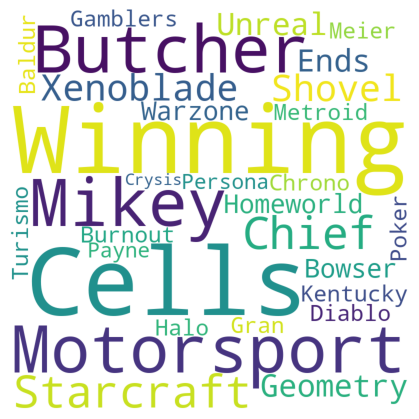

In [10]:
#VISUALISING BEST

#Get the top 30 best average words
t30awsdf = awsdf.head(30)

#Create a dictionary to put terms
t30dict = {}

#Iterate through each top word rating pair
for word,rating in zip(t30awsdf['word'],t30awsdf['rating']):
    
    #Add each word pair to the dictionary to be read by WordCloud
    t30dict.update({word:rating})
    
#Make wordCloud object from the word pair dictionary    
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(t30dict)

#Plot the word cloud
plt.figure(figsize=(8, 4), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

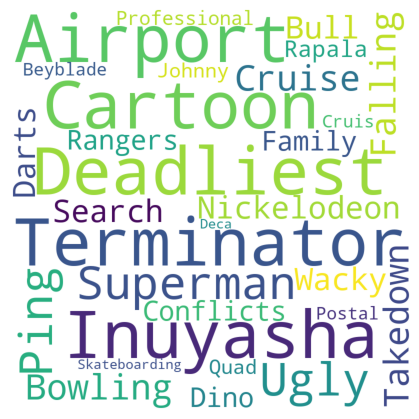

In [11]:
#VISUALISING WORST

#Get the top 30 worst average words
b30awsdf = awsdf.tail(30)

#Create a dictionary to put terms
b30dict = {}

#Iterate through each top word rating pair
for word,rating in zip(b30awsdf['word'],b30awsdf['rating']):
    
    #Add each word pair to the dictionary to be read by WordCloud
    b30dict.update({word:rating})
    
#Make wordCloud object from the word pair dictionary    
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(b30dict)

#Plot the word cloud
plt.figure(figsize=(8, 4), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [12]:
#Generating hypothetical titles from the ratings associated with words

#First we calculate the percentage frequency a successful word should be picked by dividing each rating by the total rating points
awsdf['perc'] = round(awsdf['rating']/sum(awsdf['rating']),7)

#To generate unsuccessful titles we invert the success rating by subtracting it from 100 so low scores become higher and vice versa
awsdf['negrating'] = 100-awsdf['rating']

#The negative percent frequency is calculated in the same way but using the inverted rating
awsdf['negperc'] = round(awsdf['negrating']/sum(awsdf['negrating']),7)

awsdf

,word,rating,perc,negrating,negperc
178,Winning,90,0.000663,10,0.000174
236,Cells,90,0.000663,10,0.000174
179,Motorsport,88,0.000648,12,0.000208
130,Butcher,88,0.000648,12,0.000208
229,Mikey,88,0.000648,12,0.000208
...,...,...,...,...,...
1923,Beyblade,48,0.000353,52,0.000903
1868,Cruis,48,0.000353,52,0.000903
1932,Postal,47,0.000346,53,0.000920
1931,Skateboarding,46,0.000339,54,0.000938


In [77]:
#The word pool, positive frequency weights and negative frequency weights are established
pool = awsdf['word']
weights = awsdf['perc']
nweights = awsdf['negperc']

#k number of words are picked at random from the word pool based on their weighted frequency
#The top title selection uses success the successful frequency and the low title selection uses the inverted frequency
next_top_title = choices(pool, weights, k=14)
next_low_title = choices(pool, nweights, k=14)

#f string to print out generated prodictions for weighted good or bad game titles from the choices
print(f"Don't miss out on these exciting titles!\n"
      f'The next biggest hits of 2024:\n\n1.{next_top_title[0]} {next_top_title[1]}\n'
      f'2.{next_top_title[2]} {next_top_title[3]}\n3.{next_top_title[4]} {next_top_title[5]}\n'
      f'4.{next_top_title[6]} {next_top_title[7]}\n5.{next_top_title[8]} {next_top_title[9]}\n\n'
      f'And the new dlc {next_top_title[10]} {next_top_title[11]}: {next_top_title[12]} {next_top_title[13]}\n\n'
      f"Give these terrible titles a miss!\n"
      f'The next biggest flops of 2024:\n\n1.{next_low_title[0]} {next_low_title[1]}\n'
      f'2.{next_low_title[2]} {next_low_title[3]}\n3.{next_low_title[4]} {next_low_title[5]}\n'
      f'4.{next_low_title[6]} {next_low_title[7]}\n5.{next_low_title[8]} {next_low_title[9]}\n\n'
      f'And the new sequel {next_low_title[10]} {next_low_title[11]}: {next_low_title[12]} {next_low_title[13]}')

Don't miss out on these exciting titles!
The next biggest hits of 2024:

1.Redemption Godzilla
2.Champions Muscle
3.Meltdown 2K10
4.Club Political
5.Reverie Star

And the new dlc Open Hunting: Fist Workshop

Give these terrible titles a miss!
The next biggest flops of 2024:

1.Sudoku Ballers
2.Random Casino
3.Razor Cartoon
4.Starcraft Town
5.Flight Genius

And the new sequel Empires Inuyasha: Desert Brothers
